In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding of the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a VGG-like CNN model manually
model = models.Sequential()

# First Conv Block (2 Conv Layers + MaxPooling)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Second Conv Block
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Conv Block
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Conv Block
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Fifth Conv Block
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import array_to_img
import matplotlib.pyplot as plt
# Create random image data
img_data = np.random.random(size=(100, 100, 3))

# Convert numpy array to image
img = array_to_img(img_data)

# Convert the image back to a numpy array
plt.matshow(img)

ModuleNotFoundError: No module named 'numpy'

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [13]:
(train_ds,val_ds,test_ds),metadata=tfds.load('tf_flowers',split=['train[:80%]','train[80%:90%]','train[:90%]'],with_info=True,as_supervised=True,)

In [16]:
num_classes=metadata.features['label'].num_classes
print(num_classes)

5


Using Keras preprocessing layers
resizing and rescaling 

In [27]:
image_size=180
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1./255)
])

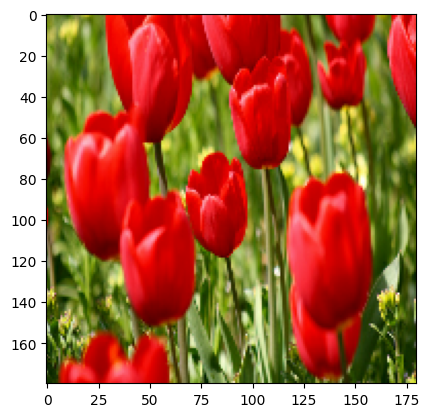

In [32]:
result=resize_and_rescale(image)
a=plt.imshow(result)

In [39]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [51]:
print(type(x_train))

<class 'numpy.ndarray'>


In [52]:
print(type(x_train[0]))

<class 'numpy.ndarray'>


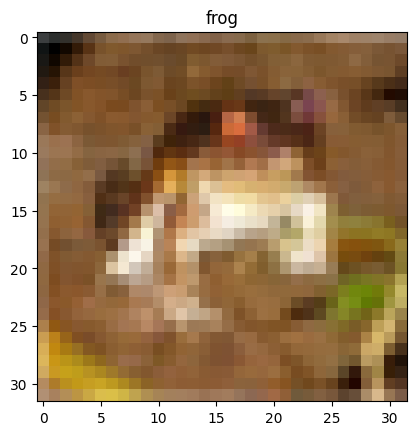

In [71]:
classes=['Airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
a=plt.imshow(x_train[0])
a=plt.title(classes[y_train[0][0]])

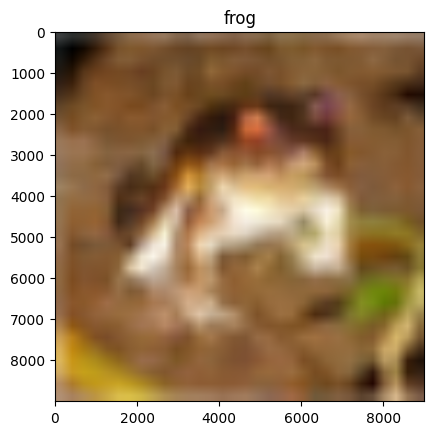

In [83]:

image_size=9000
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1./255)
])
img = keras.utils.array_to_img(x_train[0])
img= tf.convert_to_tensor(img) 
result=resize_and_rescale(img)

a=plt.imshow(result)
a=plt.title(classes[y_train[0][0]])

In [91]:
tf.experimental.numpy.experimental_enable_numpy_behavior()


data agumentation

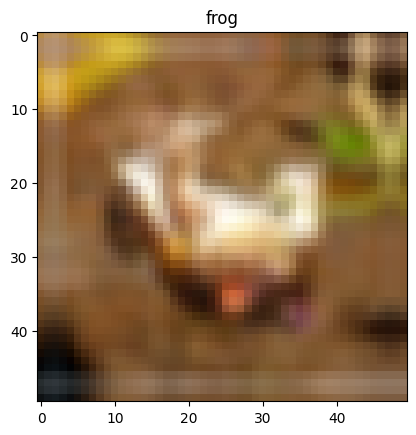

In [132]:
def random_invert_img(x, p=0):
  if  tf.random.uniform([]) < p:
    x 
  else:
    x
  return x
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.3),
  layers.RandomContrast(0.7),
  layers.RandomCrop(50,50),
  layers.Lambda(lambda img: random_invert_img(img, 0.2)),
  layers.RandomZoom((0.1,0.1)),
])
img = keras.utils.array_to_img(x_train[0])
img= tf.convert_to_tensor(img) 
result=data_augmentation(img)
result = tf.squeeze(result).numpy()  # Convert to NumPy array and remove batch dimension
result = tf.clip_by_value(result, 0, 255)

result=result.astype('uint8')
a=plt.imshow(result)
a=plt.title(classes[y_train[0][0]])

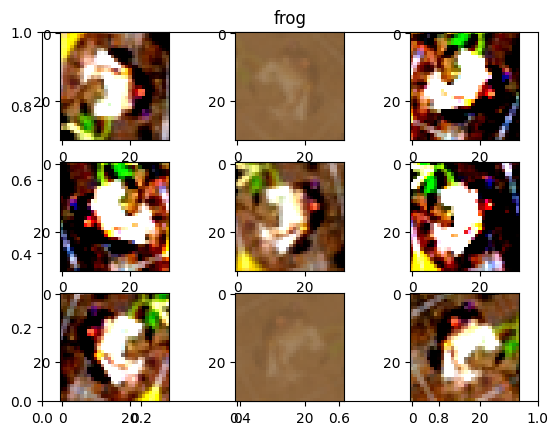

In [101]:
tf.experimental.numpy.experimental_enable_numpy_behavior()
img = keras.utils.array_to_img(x_train[0])
img= tf.convert_to_tensor(img) 
plt.figure(figure=(10,10))
plt.title(classes[y_train[0][0]])
for i in range (9):
    result=data_augmentation(img)
    result = tf.squeeze(result).numpy()  # Convert to NumPy array and remove batch dimension
    result = tf.clip_by_value(result, 0, 255)
    ax=plt.subplot(3,3,i+1)
    result=result.astype('uint8')
    a=plt.imshow(result)


In [134]:
def visualize(original,agumented):
    fig=plt.figure()
    plt.subplot(1,2,1)
    plt.title('original image')
    plt.imshow(original)
    plt.subplot(1,2,2)
    plt.title('Agumentated')
    plt.imshow(agumented)

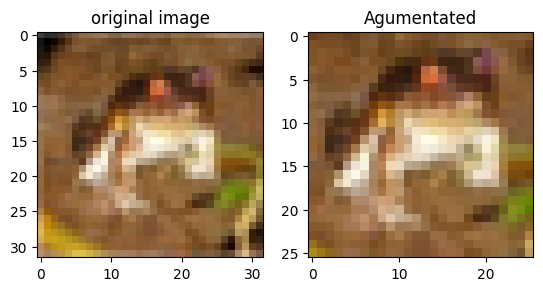

In [149]:
flipped=tf.image.flip_left_right(img)
grayscaled=tf.image.rgb_to_grayscale(img)
saturated=tf.image.adjust_saturation(img,9)
bright=tf.image.adjust_brightness(img,0.4)
cropped=tf.image.central_crop(img,central_fraction=0.8)
visualize(img,cropped)